In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [436]:
# Reading the LiverPatient dataset
dataset = pd.read_csv('LiverPatient.csv')
dataset.head

array([1., 2.])

In [427]:
# Cleaning the dataset by dropping duplicate rows and rows containing null values
dataset.drop_duplicates(inplace = True)
dataset.dropna(inplace = True, how = 'any')

dataset.shape

(570, 11)

In [428]:
# Splitting the features and target column from the dataset
X = dataset.iloc[:, 0:10]
Y = dataset.iloc[:, -1]

In [429]:
# Encoding the gender feature into numeric values and Scaling the numerical featuers of the dataset
label_encoder = LabelEncoder()
X.gender = label_encoder.fit_transform(X.gender)

data_scaler = StandardScaler()
X = data_scaler.fit_transform(X)

X = pd.DataFrame(X)

In [430]:
# Creating objects of models and lists for calculating performance metrics
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
kf = KFold(n_splits = 7, shuffle = True, random_state = 10)

accuracy_knn = list()
precision_knn = list()
recall_knn = list()
f1_knn = list()

accuracy_dtree = list()
precision_dtree = list()
recall_dtree = list()
f1_dtree = list()


In [431]:
# Training models using K-Fold Cross Validation
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    knn.fit(x_train, y_train)
    dtree.fit(x_train, y_train)

    y_pred_knn = knn.predict(x_test)
    y_pred_dtree = dtree.predict(x_test)
    
    accuracy_knn.append(accuracy_score(y_test, y_pred_knn))
    accuracy_dtree.append(accuracy_score(y_test, y_pred_dtree))

    precision_knn.append(precision_score(y_test, y_pred_knn))
    precision_dtree.append(precision_score(y_test, y_pred_dtree))

    recall_knn.append(recall_score(y_test, y_pred_knn))
    recall_dtree.append(recall_score(y_test, y_pred_dtree))

    f1_knn.append(f1_score(y_test, y_pred_knn))
    f1_dtree.append(f1_score(y_test, y_pred_dtree))

knn_acc = round(np.average(accuracy_knn), 2)
knn_prec = round(np.average(precision_knn), 2)
knn_rec = round(np.average(recall_knn), 2)
knn_f1 = round(np.average(f1_knn), 2)

dtree_acc = round(np.average(accuracy_dtree), 2)
dtree_prec = round(np.average(precision_dtree), 2)
dtree_rec = round(np.average(recall_dtree), 2)
dtree_f1 = round(np.average(f1_dtree), 2)

print("Accuracy of KNN\t\t: ", knn_acc)
print("Precision of KNN\t: ", knn_prec)
print("Recall of KNN\t\t: ", knn_rec)
print("F1 Score of KNN\t\t: ", knn_f1)

print("Accuracy of Decision Tree\t: ", dtree_acc)
print("Precision of Decision Tree\t: ", dtree_prec)
print("Recall of Decision Tree\t\t: ", dtree_rec)
print("F1 Score of Decision Tree\t: ", dtree_f1)

Accuracy of KNN		:  0.67
Precision of KNN	:  0.75
Recall of KNN		:  0.81
F1 Score of KNN		:  0.78
Accuracy of Decision Tree	:  0.61
Precision of Decision Tree	:  0.73
Recall of Decision Tree		:  0.7
F1 Score of Decision Tree	:  0.72


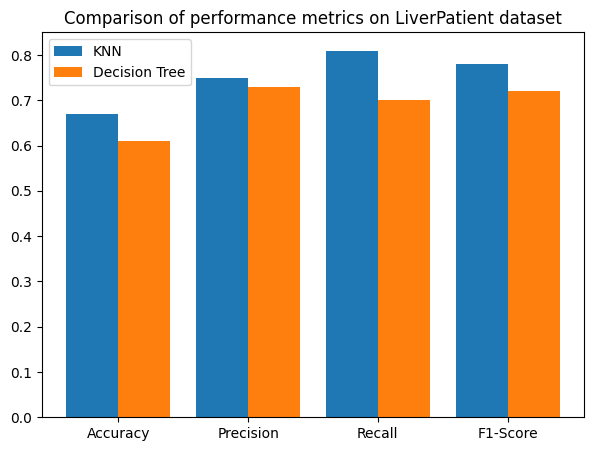

In [432]:
# Bar chart for comparing performance of two models on this dataset

knn_metrics = [knn_acc, knn_prec, knn_rec, knn_f1]
dtree_metrics = [dtree_acc, dtree_prec, dtree_rec, dtree_f1]
 
metrics_names = ['Accuracy','Precision','Recall','F1-Score']
knn_metrics = [knn_acc, knn_prec, knn_rec, knn_f1]
dtree_metrics = [dtree_acc, dtree_prec, dtree_rec, dtree_f1]
  
x_axis = np.arange(len(metrics_names))

plt.figure(figsize = (7, 5))
plt.bar(x_axis - 0.2, knn_metrics, 0.4, label = 'KNN')
plt.bar(x_axis + 0.2, dtree_metrics, 0.4, label = 'Decision Tree')
  
plt.xticks(x_axis, metrics_names)
plt.title("Comparison of performance metrics on LiverPatient dataset")
plt.legend()
plt.show()